# Tarefa

- 1 - Ler os dados
- 2 - Dividir os dados em treino e teste (70/30)
- 3 - Criar função de custo
- 4 - Criar função de avaliação
- 5 - Inicializar os Betas com Valores aleatórios
- 6 - Criar a função da Descida do Gradiente
- 7 - Avaliação do conjunto de testes (predições)
- 8 - Calcular RSME

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

## STEP 1 - Ler os dados

In [2]:
df = pd.read_csv("regression_dataset.csv")
df

,profit,morning,after_noon,night,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,...,March,April,May,June,July,August,September,October,November,December
0,0.90,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.60,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.40,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.15,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232663,0.15,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
232664,1.20,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
232665,0.30,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
232666,1.30,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Tentativa de desbugar a base

In [3]:
#df = df[df['profit'] <= 10]


In [4]:
#df

In [5]:
menor_5 = df[df['profit'] <= 5]
maior_5 = df[df['profit'] > 5]

In [6]:
menor_5

,profit,morning,after_noon,night,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,...,March,April,May,June,July,August,September,October,November,December
0,0.90,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.60,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.40,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.15,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.80,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232663,0.15,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
232664,1.20,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
232665,0.30,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
232666,1.30,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [7]:
maior_5

,profit,morning,after_noon,night,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,...,March,April,May,June,July,August,September,October,November,December
4,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,6.6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,7.2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,6.6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,7.2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232584,7.6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
232648,5.2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
232654,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
232655,5.2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Base restante = 98.31% -> 230072
Base Removida = 0.16 -> 3933

## STEP 2- Dividir os dados em treino e teste (70/30)

In [8]:
y_data = df["profit"]
y_data

0         0.90
1         3.60
2         2.40
3         1.15
4         6.00
          ... 
232663    0.15
232664    1.20
232665    0.30
232666    1.30
232667    1.30
Name: profit, Length: 232668, dtype: float64

In [9]:
x_data = df.drop(columns=["profit"])
x_data

,morning,after_noon,night,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,...,March,April,May,June,July,August,September,October,November,December
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232663,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
232664,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
232665,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
232666,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [10]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.7)

## STEP 3 - Criar função de custo

O código define a função `calc_costs`, que calcula a função de custo para uma regressão linear múltipla. Essa função de custo é comumente usada em algoritmos de aprendizado de máquina para otimizar os parâmetros de um modelo de regressão.

### Explicação do código

1. **Função de Custo**: A função de custo para regressão linear é baseada no erro quadrático médio. O objetivo é encontrar os parâmetros que minimizam a diferença entre as previsões do modelo e os valores reais do conjunto de dados.

    <code>J(θ) = (1 / 2m) * Σ (previsão<sub>i</sub> - y<sub>i</sub>)<sup>2</sup></code>

   Aqui:
   - \( m \) é o número de exemplos de treinamento.
   - \( \text{previsão}_i \) é o valor previsto pelo modelo para o exemplo \( i \).
   - \( y_i \) é o valor real para o exemplo \( i \).

2. **Parâmetros da Função**:
   - `X`: É uma matriz `m x n` onde cada linha representa um exemplo de treinamento e cada coluna representa uma característica (ou variável independente).
   - `y`: É um vetor de valores reais, com tamanho `m`.
   - `theta`: É um vetor de parâmetros (ou pesos), com tamanho `n`, que o modelo ajustará para minimizar o erro.

3. **Passos dentro da função**:
   - `m = len(y)`: Calcula o número de exemplos de treinamento.
   - `predictions = X.dot(theta)`: Realiza a multiplicação de matriz `X` por `theta`, resultando nas previsões do modelo para cada exemplo.
   - `errors = predictions - y`: Calcula a diferença (erro) entre as previsões e os valores reais.
   - `cost = (1 / (2 * m)) * sum(errors ** 2)`: Calcula o custo médio dos erros quadráticos. A divisão por \(2m\) é uma convenção para simplificar a derivada durante a otimização.

4. **Exemplo de Uso**:
   - `X = np.array([[1, 2], [1, 3], [1, 4], [1, 5]])`: Matriz de características, onde a primeira coluna representa o termo de bias (com valores iguais a 1) e a segunda coluna é a característica.
   - `y = np.array([7, 6, 5, 4])`: Valores reais para cada exemplo.
   - `theta = np.array([0.1, 0.2])`: Vetor de parâmetros iniciais.

5. **Resultado**:
   - `cost = calc_costs(X, y, theta)`: Calcula o custo com os valores atuais de `theta`.
   - `print(cost)`: Exibe o custo calculado, que indica o quão bem os parâmetros atuais se ajustam aos dados. Quanto menor o valor do custo, melhor o modelo se ajusta aos dados.

Este cálculo é útil principalmente em algoritmos de aprendizado de máquina como o gradiente descendente, onde o objetivo é minimizar o custo ajustando `theta`.

In [11]:
def mean_squared_error(errors: np.ndarray) -> float:
    """
    Calcula o erro quadrático médio (MSE).
    
    Parâmetros:
    errors : array-like
        Vetor de erros, que é a diferença entre as previsões e os valores reais.
        
    Retorna:
    float
        O valor do MSE.
    """
    m = len(errors)  # Tamanho do conjunto
    mse = (1 / (2 * m)) * sum(errors ** 2)  # Calcula o erro quadrático médio
    return mse

In [12]:
def calc_costs(X:np.ndarray, y:list, theta:list):
    """
    Calcula a função de custo para a regressão linear múltipla.

    Parâmetros:
    X : array-like, shape (m, n)
        Matriz de características, onde m é o número de exemplos e n é o número de características.
    y : array-like, shape (m,)
        Vetor de valores reais.
    theta : array-like, shape (n,)
        Vetor de parâmetros.

    Retorna:
    float
        O valor da função de custo.
    """
    predictions = X.dot(theta)  # Calcula as previsões realizando a multiplicação de matriz entre X e theta
    errors = predictions - y  # Calcula os erros subtraindo a predição do valor real, quanto mais perto de zero, melhor
    cost = mean_squared_error(errors)  # Calcula o custo
    return cost


# # Exemplo de dados
# X = np.array([[1, 2], [1, 3], [1, 4], [1, 5]])  # Adicionando uma coluna de 1s para o termo de bias
# y = np.array([7, 6, 5, 4])
# theta = np.array([0.1, 0.2])

# # Calculando o custo
# cost = calc_costs(X, y, theta)
# print(cost)

## Step 4 - Criar função de avaliação

In [13]:
def my_mrse(pred_y: list, y_test:list):
    erro = 0

    for i in range(len(pred_y)):

        erro += (pred_y[i] - y_test[i]) ** 2

    erro = (erro/len(pred_y)) ** 0.5
    return erro

## STEP 5: Inicializar os Betas com Valores aleatórios

In [14]:
def initialize_theta(n: int):
    """
    Inicializa os parâmetros theta com valores aleatórios.

    Parâmetros:
    n : int
        Número de características (incluindo o termo de bias).

    Retorna:
    numpy.ndarray
        Vetor de parâmetros inicializados aleatoriamente.
    """
    np.random.seed(42)  # Definindo uma seed para reprodutibilidade (A escolha do número 42 como seed para a geração de números aleatórios é uma referência cultural popular. O número 42 é conhecido como "a resposta para a vida, o universo e tudo mais" no livro "O Guia do Mochileiro das Galáxias" de Douglas Adams. É uma escolha comum entre programadores e cientistas de dados por causa dessa referência. No entanto, a escolha do número 42 é arbitrária e qualquer outro número poderia ser usado como seed. O importante é que definir uma seed garante que a sequência de números aleatórios gerados seja a mesma a cada execução do código, o que é útil para reprodutibilidade e depuração.)
    theta = np.random.rand(n)
    return theta
# Exemplo de uso
# num_features = 3  # Supondo que temos 2 características + 1 termo de bias
# theta = initialize_theta(num_features)
# print(theta)

## STEP 6: Criar a função da Descida do Gradiente

In [15]:
def gradient_descent(X:np.ndarray, y:list, theta:list, alpha:float, num_iters: int = 1000):
    """
    Realiza a descida do gradiente para ajustar os parâmetros theta.

    Parâmetros:
    X : array-like, shape (m, n)
        Matriz de características, onde m é o número de exemplos e n é o número de características.
    y : array-like, shape (m,)
        Vetor de valores reais (nossos alvos, vulgo targets).
    theta : array-like, shape (n,)
        Vetor de parâmetros (nossos betas obtidos da funcao de gerar betas).
    alpha : float
        Taxa de aprendizado. (podemos usar 0.1, 0.01, 0.001 e assim por diante)
    num_iters : int
        Número de iterações (geralmente 1000).

    Retorna:
    numpy.ndarray
        Vetor de parâmetros ajustados.
    list
        Histórico dos valores da função de custo.
    """
    m = len(y)  # Número de exemplos de treinamento
    cost_history = []
    

    for _ in range(num_iters):
        predictions = X.dot(theta)  # Calcula as previsões
        errors = predictions - y  # Calcula os erros
        gradient = (1 / m) * X.T.dot(errors)  # Calcula o gradiente
        theta = theta - alpha * gradient  # Atualiza os parâmetros
        
        # Calcula e armazena o valor da função de custo
        cost = (1 / (2 * m)) * sum(errors ** 2)
        cost_history.append(cost)

    return theta, cost_history

# # Exemplo de uso
# X = np.array([[1, 2], [1, 3], [1, 4], [1, 5]])  # Adicionando uma coluna de 1s para o termo de bias
# y = np.array([7, 6, 5, 4])
# num_features = X.shape[1]
# theta = initialize_theta(num_features)
# alpha = 0.01
# num_iters = 1000

# # Realizando a descida do gradiente
# theta, cost_history = gradient_descent(X, y, theta, alpha, num_iters)
# print("Parâmetros ajustados:", theta)
# print("Histórico de custo:", cost_history[-10:])  # Mostrando os últimos 10 valores do custo

## STEP 7 - Avaliação do conjunto de testes (predições)

In [ ]:
def train(
        x_train: np.ndarray,
        x_test:np.ndarray, 
        y_train: np.ndarray, 
        alpha=0.01, 
        num_iters=1000
    ):
    betas = initialize_theta(x_train.shape[1])
    alpha = 0.01    
    num_iters = 1000
    betas, cost_history = gradient_descent(x_train, y_train, betas, alpha, num_iters)

    print(cost_history)

    predictions = predictions = x_test.dot(betas)

    return predictions, cost_history


In [17]:
predictions,cost_history = train(x_train, x_test, y_train)

[3.634471278940029, 3.6257742590859676, 3.6172284856414385, 3.608831271812302, 3.6005799787467043, 3.5924720146785583, 3.5845048340863315, 3.5766759368668635, 3.5689828675239563, 3.561423214371464, 3.5539946087506236, 3.5466947242613744, 3.539521276007422, 3.532472019854783, 3.525544751703594, 3.518737306772923, 3.512047558898374, 3.5054734198422377, 3.499012838615973, 3.492663800814799, 3.486424327964176, 3.480292476877968, 3.4742663390280795, 3.4683440399253507, 3.4625237385115253, 3.4568036265620754, 3.4511819280997114, 3.445656898818361, 3.440226825517451, 3.434890025546295, 3.429644846258416, 3.424489664475612, 3.4194228859616103, 3.4144429449051183, 3.4095483034121212, 3.404737451007249, 3.40000890414405, 3.3953612057240297, 3.3907929246242676, 3.386302655233493, 3.3818890169964364, 3.3775506539663356, 3.373286234365431, 3.3690944501533195, 3.3649740166030226, 3.360923671884625, 3.3569421766563603, 3.3530283136629992, 3.349180887341418, 3.3453987234332163, 3.3416806686042526, 3.3

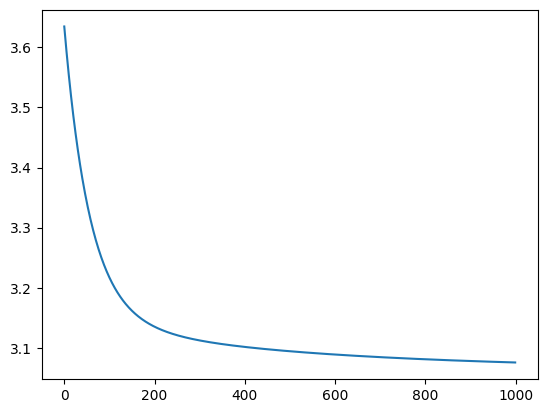

In [18]:
plt.plot(cost_history)

## STEP 8 - Calcular RMSE

In [19]:
predictions = predictions.tolist()
y_test = y_test.tolist()

In [20]:
mse = my_mrse(predictions, y_test)
print("MRSE:", mse)

MRSE: 2.5050171110440473


In [21]:
from sklearn.metrics import root_mean_squared_error

rmse = root_mean_squared_error(y_test, predictions)
rmse

np.float64(2.505017111044012)

In [22]:
from sklearn.linear_model import  LinearRegression
model = LinearRegression()

In [23]:
model.fit(x_train,y_train)

LinearRegression()

In [24]:
y_pred_sklearn = model.predict(x_test)
x_train

,morning,after_noon,night,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,...,March,April,May,June,July,August,September,October,November,December
161790,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102493,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
182413,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
228122,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
88285,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118641,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
174546,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34479,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
159920,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


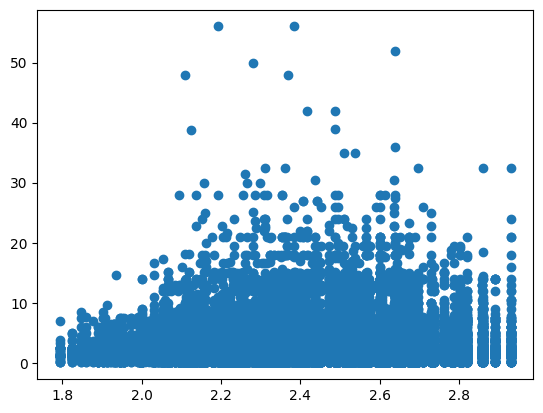

In [25]:
plt.plot(y_pred_sklearn, y_test, 'o')

In [26]:
min(y_test)

0.07

## Desafios

- Plot dos resultados com scatterplot
- Usar K-Fold
- Apresentar os acertos

## Scatter Plot

In [27]:
predictions[:10]

[1.922878094805501,
 2.8116307659199666,
 2.8400151783615533,
 2.4792876376933766,
 2.2767145967482176,
 2.2202609440398637,
 2.6904251962949557,
 2.3149138698993244,
 2.082757747592379,
 2.4904707414794536]

In [28]:
y_test[:10]

[0.15, 0.6, 1.25, 0.3, 1.1, 1.0, 2.5, 1.2, 2.1, 1.3]

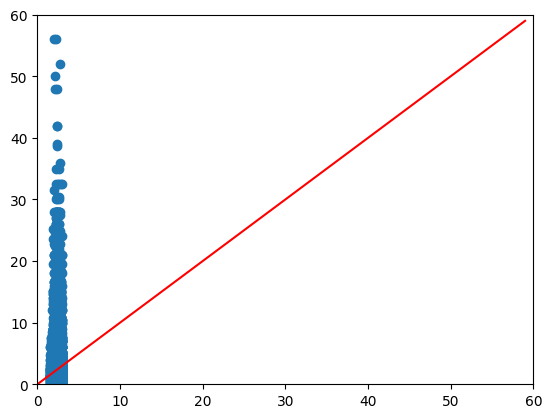

In [29]:
plt.scatter(predictions, y_test)
plt.xlim([0,60])
plt.ylim([0,60])
plt.plot(range(0,60), range(0,60), "-r")

## Métrica Escolhida

In [30]:
def accuracy_score(y_pred, y_true):
    """
    Calcula a acurácia das predições.

    Parâmetros:
    y_true : list
        Lista de valores reais.
    y_pred : list
        Lista de valores preditos.

    Retorna:
    float
        Acurácia das predições.
    """
    
    # Conta o número de predições corretas
    correct_predictions = 0
    for true, pred in zip(y_true, y_pred):
        if true == pred:
            correct_predictions += 1
    
    # Calcula a acurácia
    accuracy = correct_predictions / len(y_true)
    return accuracy

In [31]:
def my_sum(array: list) -> int | float:
    value = 0

    for number in array:
        value += number

    return value

def my_mean(array: list) -> float:
    
    mean = my_sum(array)

    mean = mean/len(array)

    return mean


def my_variance(values):
    mean = my_mean(values)

    variance = 0

    for value in values:

        variance += (value - mean) ** 2

    variance /= len(values)

    return variance


def my_std(values):

    variance = my_variance(values)

    return variance ** 0.5

## K FOLD

In [32]:
from random import shuffle

def k_fold(data: np.ndarray, target: np.ndarray, k: int=5, random: bool=True):
    # Embaralhar os dados
    if random:
        combined = list(zip(data, target))
        shuffle(combined)
        data[:], target[:] = zip(*combined) # * serve pra descompactar a lista de tuplas para o zip conseguir remontar os dados
        

    fold_size = len(data) // k

    errors = []
    accuracies = []

    for i in range(k):
        start = i * fold_size
        end = (i + 1) * fold_size

        x_test = data[start:end]
        y_test = target[start:end]

        x_train = np.concatenate([data[:start], data[end:]]) # Seleciona os dados de treino para o fold atual. Pega todos os dados antes do índice start e todos os dados após o índice end, e os concatena.
        y_train = np.concatenate([target[:start], target[end:]]) # Seleciona os alvos de treino para o fold atual. Pega todos os alvos antes do índice start e todos os alvos após o índice end, e os concatena.

        predictions, _ = train(x_train, x_test, y_train)
        
        errors.append(
            my_mrse(predictions, y_test)
        )

        accuracies.append(
            accuracy_score(predictions, y_test)
        )


    return errors, accuracies


In [33]:
errors, accuracies = k_fold(x_data.to_numpy(), y_data.to_numpy(), k=5)

[np.float64(3.6619066617666767), np.float64(3.6524409182680104), np.float64(3.6431479577986265), np.float64(3.634024572109434), np.float64(3.625067612714406), np.float64(3.6162739897755523), np.float64(3.6076406710098685), np.float64(3.5991646806173625), np.float64(3.590843098226514), np.float64(3.582673057862803), np.float64(3.5746517469338817), np.float64(3.566776405233576), np.float64(3.559044323966316), np.float64(3.551452844789058), np.float64(3.5439993588701046), np.float64(3.5366813059659887), np.float64(3.529496173517326), np.float64(3.522441495756856), np.float64(3.5155148528405262), np.float64(3.5087138699893794), np.float64(3.5020362166517565), np.float64(3.495479605673946), np.float64(3.4890417924979644), np.float64(3.4827205743617906), np.float64(3.476513789524183), np.float64(3.470419316497366), np.float64(3.4644350732984823), np.float64(3.458559016712713), np.float64(3.452789141569639), np.float64(3.4471234800352817), np.float64(3.441560100916415), np.float64(3.436097108

In [34]:
errors

[np.float64(2.5165611358764792),
 np.float64(2.4878517447795194),
 np.float64(2.5157623016622765),
 np.float64(2.5109003470762734),
 np.float64(2.43341594835871)]

In [35]:
accuracies

[0.0, 0.0, 0.0, 0.0, 0.0]

In [36]:
print(f"{my_mean(errors):.2f} +- {my_std(errors):.2f}")

2.49 +- 0.03
